# Yelp System Menu - Reviews

https://medium.com/locally-optimal/yelp-open-dataset-a-new-version-is-available-6c3a83bddd

https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset

https://www.yelp.com/dataset/documentation/main

## Loading Packages and Dataset

In [31]:
# Imports
import pandas as pd
import numpy as np
import spacy
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm


plt.style.use('ggplot')
%matplotlib inline

In [32]:
# Loading dataset
df = pd.read_parquet('file/yelp_food_df.parquet')

In [33]:
df.head()

,stars,useful,funny,cool,text
2,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...
3,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo..."
4,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...
9,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...
10,5.0,2,0,0,My experience with Shalimar was nothing but wo...


## Preprocessing

In [34]:
# Preprocess the 'review_full' column
df['text'] = df['text'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).lower())

# Display the first few rows of the cleaned reviews
df['text'].head()

2     family diner had the buffet eclectic assortmen...
3     wow  yummy different  delicious   our favorite...
4     cute interior and owner  gave us tour of upcom...
9     had a party of  here for hibachi our waitress ...
10    my experience with shalimar was nothing but wo...
Name: text, dtype: object

In [35]:
# Create index
df = df.reset_index()
df = df.rename(columns={'index': 'id'})

In [36]:
df.head(10)

,id,stars,useful,funny,cool,text
0,2,3.0,0,0,0,family diner had the buffet eclectic assortmen...
1,3,5.0,1,0,1,wow yummy different delicious our favorite...
2,4,4.0,1,0,1,cute interior and owner gave us tour of upcom...
3,9,3.0,0,0,0,had a party of here for hibachi our waitress ...
4,10,5.0,2,0,0,my experience with shalimar was nothing but wo...
5,12,4.0,0,0,0,love going here for happy hour or dinner grea...
6,13,4.0,0,0,0,good foodloved the gnocchi with marinara\nthe ...
7,14,4.0,0,2,0,the bun makes the sonoran dog its like a snugg...
8,17,4.0,1,0,0,the hubby and i have been here on multiple occ...
9,19,5.0,0,0,0,my absolute favorite cafe in the city their bl...


## Sentiment Analysis

In [37]:
df_sample = df.sample(10000)

In [38]:
df_sample.shape

(10000, 6)

In [39]:
del df

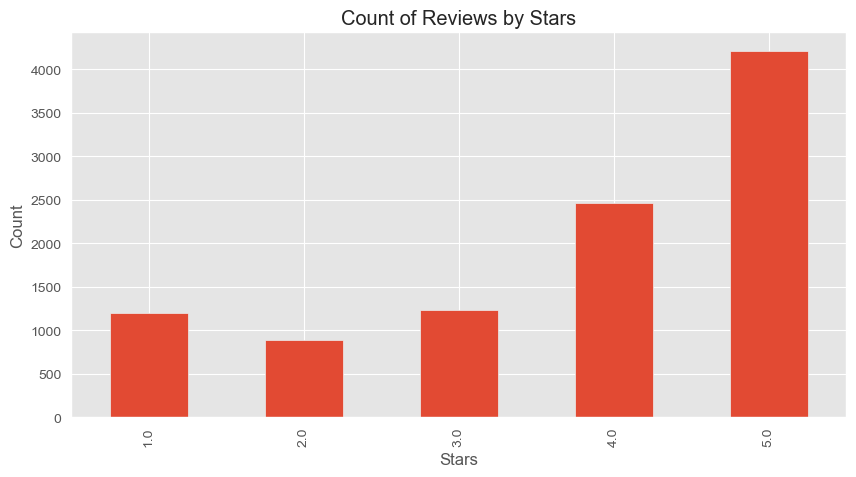

In [40]:
ax = df_sample['stars'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10,5))
ax.set(xlabel='Stars', ylabel='Count')
plt.show()

### Roberta Pre Trained Model

In [41]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
#tokens = nltk.word_tokenize(example)
#tokens[:10]

In [45]:
# Define the function
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return {'negative': scores[0], 'neutral': scores[1], 'positive': scores[2]}

In [46]:
%%time
# Apply the function to each row
df_sample['sentiment'] = df_sample['text'].apply(polarity_scores_roberta)

CPU times: total: 1d 15h 22min 45s
Wall time: 15h 40min 39s


In [47]:
df_sample.head()

,id,stars,useful,funny,cool,text,sentiment
1251197,2980811,4.0,0,0,0,we landed at the reno airport for our honeymoo...,"{'negative': 0.03076893, 'neutral': 0.24498378..."
197231,467079,4.0,12,3,7,this atmosphere is certainly geared towards am...,"{'negative': 0.032657385, 'neutral': 0.1757533..."
226443,543661,1.0,3,0,0,food and service are key components to enjoy a...,"{'negative': 0.89177763, 'neutral': 0.09713327..."
263340,638958,5.0,4,2,4,cyranos is a hidden gem that i wish i had know...,"{'negative': 0.0024086738, 'neutral': 0.013464..."
151897,352283,5.0,1,0,2,wow kekes truly impressed me this afternoon m...,"{'negative': 0.002309262, 'neutral': 0.0097565..."


In [54]:
df_sample.shape

(10000, 7)

In [48]:
df_sample.to_parquet('file/yelp_food_df_sample_roberta.parquet')

In [49]:
df_sample.to_parquet('yelp_food_df_sample_roberta.parquet', engine='pyarrow')

In [50]:
df_sample.to_csv('yelp_food_sentiment_df_sample_roberta.csv', index=False)

In [29]:
 #  Empty memory
 #%reset -f

In [51]:
df_sample.head(10)

,id,stars,useful,funny,cool,text,sentiment
1251197,2980811,4.0,0,0,0,we landed at the reno airport for our honeymoo...,"{'negative': 0.03076893, 'neutral': 0.24498378..."
197231,467079,4.0,12,3,7,this atmosphere is certainly geared towards am...,"{'negative': 0.032657385, 'neutral': 0.1757533..."
226443,543661,1.0,3,0,0,food and service are key components to enjoy a...,"{'negative': 0.89177763, 'neutral': 0.09713327..."
263340,638958,5.0,4,2,4,cyranos is a hidden gem that i wish i had know...,"{'negative': 0.0024086738, 'neutral': 0.013464..."
151897,352283,5.0,1,0,2,wow kekes truly impressed me this afternoon m...,"{'negative': 0.002309262, 'neutral': 0.0097565..."
2306988,5523173,5.0,0,0,0,its quite a drive to sparks but there are only...,"{'negative': 0.001668791, 'neutral': 0.0258900..."
1354912,3227020,5.0,1,0,1,my husband and i visited this location for lun...,"{'negative': 0.005358832, 'neutral': 0.0154562..."
1679076,4020477,4.0,7,0,1,finally stopped by here after getting tired of...,"{'negative': 0.01297333, 'neutral': 0.13685685..."
27814,63876,1.0,1,1,0,i went here for lunch after an extremely cold ...,"{'negative': 0.9374432, 'neutral': 0.056306697..."
1893515,4523556,5.0,0,0,0,called and ordered the chicken tikka pizza es...,"{'negative': 0.0073354337, 'neutral': 0.073567..."
